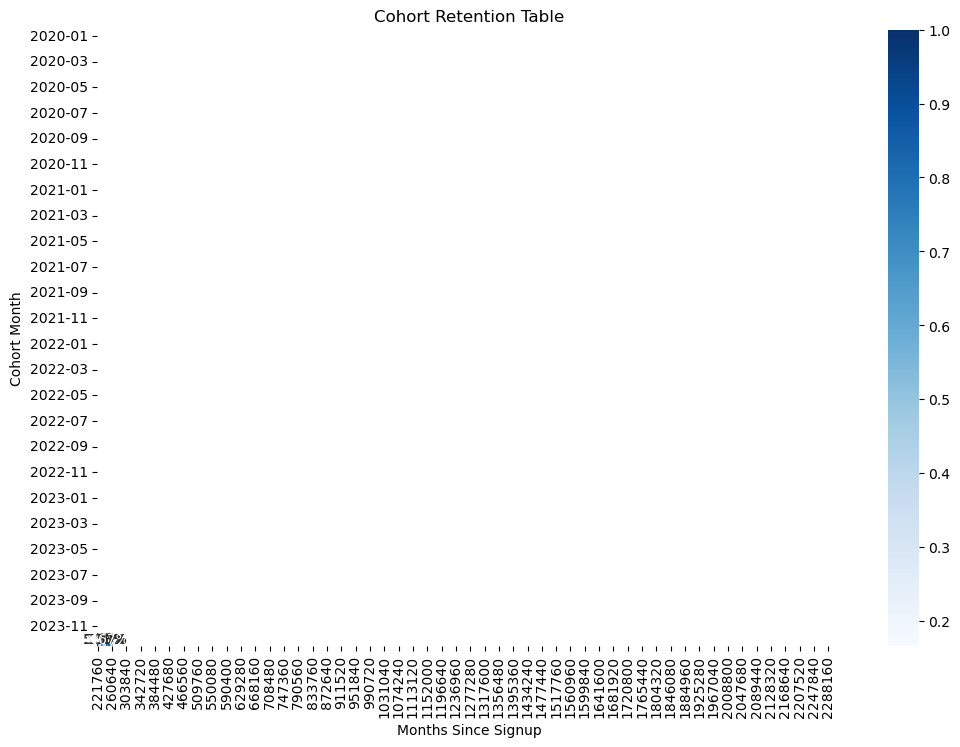

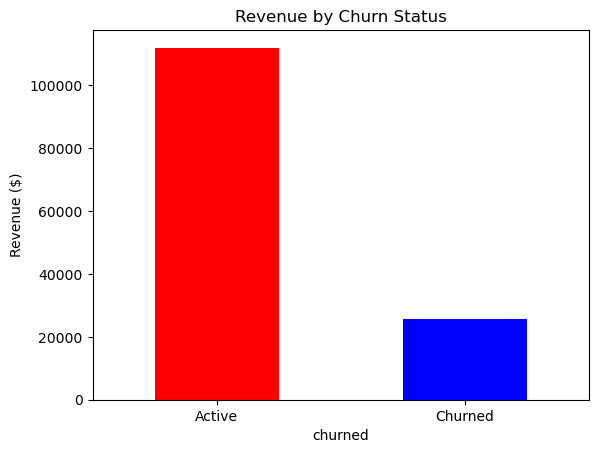

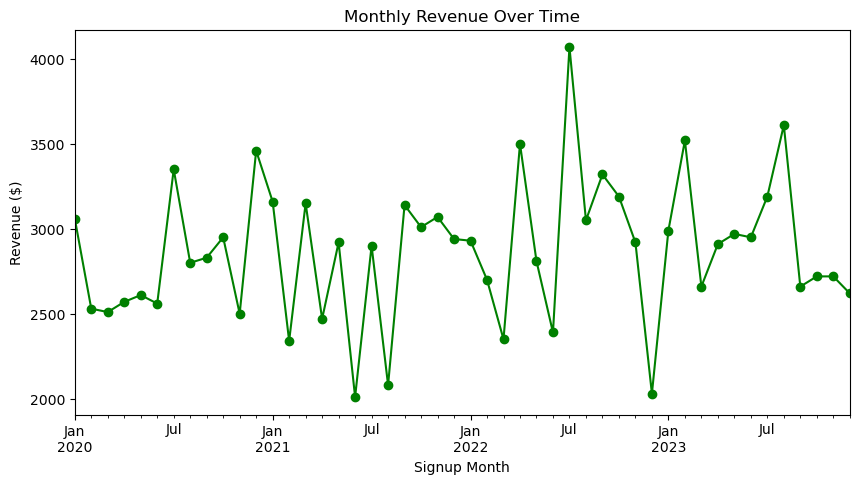

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("saas_customer_data.csv", parse_dates=['signup_date'])

# Assign cohort month
df['cohort_month'] = df['signup_date'].dt.to_period('M')

# Simulate current date for retention calculation
df['current_date'] = pd.to_datetime('2024-06-01')  # today
df['tenure_months'] = ((df['current_date'] - df['signup_date'])/np.timedelta64(1, 'm')).round().astype(int)

# Build cohort table
cohort_data = df.groupby(['cohort_month', 'tenure_months']) \
                .agg({'user_id': 'count'}) \
                .reset_index()

cohort_pivot = cohort_data.pivot(index='cohort_month', columns='tenure_months', values='user_id')

# Normalize for retention %
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0)

# Plot retention heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap="Blues")
plt.title('Cohort Retention Table')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since Signup')
plt.show()

#revenue of churned vs active users

churn_revenue = df.groupby('churned')['monthly_revenue'].sum()

churn_revenue.plot(kind='bar', color=['red','blue'])
plt.title("Revenue by Churn Status")
plt.ylabel("Revenue ($)")
plt.xticks([0, 1], ['Active','Churned'], rotation=0)
plt.show()

# Monthly revenue
df['signup_month'] = df['signup_date'].dt.to_period('M')
monthly_revenue = df.groupby('signup_month')['monthly_revenue'].sum()

monthly_revenue.plot(figsize=(10,5), marker='o', color='green')
plt.title("Monthly Revenue Over Time")
plt.ylabel("Revenue ($)")
plt.xlabel("Signup Month")
plt.show()


